In [57]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [58]:
df = pd.read_csv("/Users/roya/Downloads/Fuel Consumption Ratings 2023.csv", encoding='latin-1')
df

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.shape

(856, 15)

In [60]:
df.nunique()

Year                            9
Make                           60
Model                         657
Vehicle Class                  14
Engine Size (L)                31
Cylinders                       7
Transmission                   23
Fuel Type                       4
Fuel Consumption (L/100Km)    153
Hwy (L/100 km)                103
Comb (L/100 km)               128
Comb (mpg)                     43
CO2 Emissions (g/km)          237
CO2 Rating                      9
Smog Rating                     6
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

In [63]:
df.isnull().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

In [64]:
label_encoder = LabelEncoder()

categorical_columns = ['Fuel Type']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [65]:
df

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,3,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,3,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,3,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,3,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
res = df.select_dtypes(include=['int', 'float'])
res

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,3,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,3,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,3.5,6.0,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,3.0,6.0,3,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
851,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
imputer = KNNImputer()
x = imputer.fit_transform(res)
df = pd.DataFrame(x, columns=res.columns)
df

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3.0,7.9,6.30,7.20,39.0,167.0,6.0,7.0
1,1.5,4.0,3.0,8.1,6.50,7.40,38.0,172.0,6.0,7.0
2,1.5,4.0,3.0,8.9,6.50,7.80,36.0,181.0,6.0,6.0
3,3.5,6.0,3.0,12.6,9.40,11.20,25.0,263.0,4.0,5.0
4,3.0,6.0,3.0,13.8,11.20,12.40,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
851,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
852,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
853,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
854,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4


In [68]:
df.isnull().sum()

Engine Size (L)               0
Cylinders                     0
Fuel Type                     0
Fuel Consumption (L/100Km)    0
Hwy (L/100 km)                0
Comb (L/100 km)               0
Comb (mpg)                    0
CO2 Emissions (g/km)          0
CO2 Rating                    0
Smog Rating                   0
dtype: int64

In [69]:
df

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3.0,7.9,6.30,7.20,39.0,167.0,6.0,7.0
1,1.5,4.0,3.0,8.1,6.50,7.40,38.0,172.0,6.0,7.0
2,1.5,4.0,3.0,8.9,6.50,7.80,36.0,181.0,6.0,6.0
3,3.5,6.0,3.0,12.6,9.40,11.20,25.0,263.0,4.0,5.0
4,3.0,6.0,3.0,13.8,11.20,12.40,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...
851,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
852,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
853,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4
854,4.1,6.8,4.0,12.7,8.78,10.92,26.6,255.8,4.8,5.4


<Axes: >

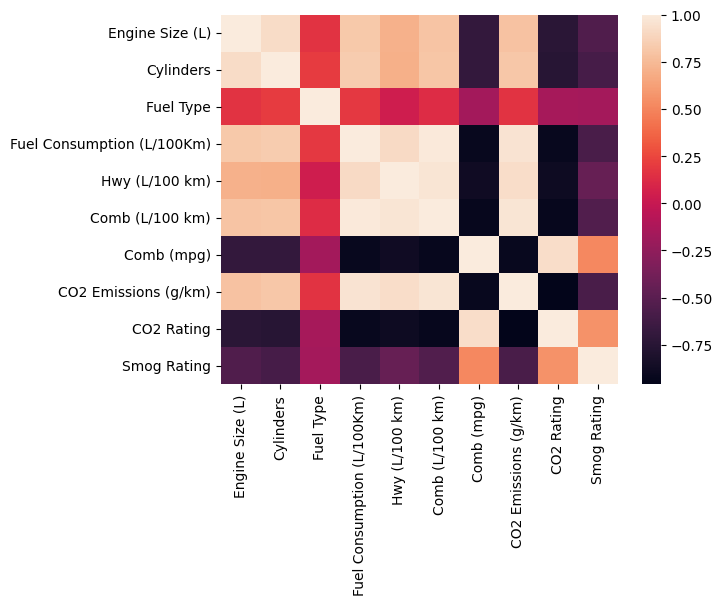

In [70]:
sns.heatmap(df.corr())

In [71]:
X = df.drop(['CO2 Emissions (g/km)'],axis=1)
y = df['CO2 Emissions (g/km)']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [75]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 7.22
Mean Squared Error (MSE): 92.91
Root Mean Squared Error (RMSE): 9.64
R-squared (R2): 0.97


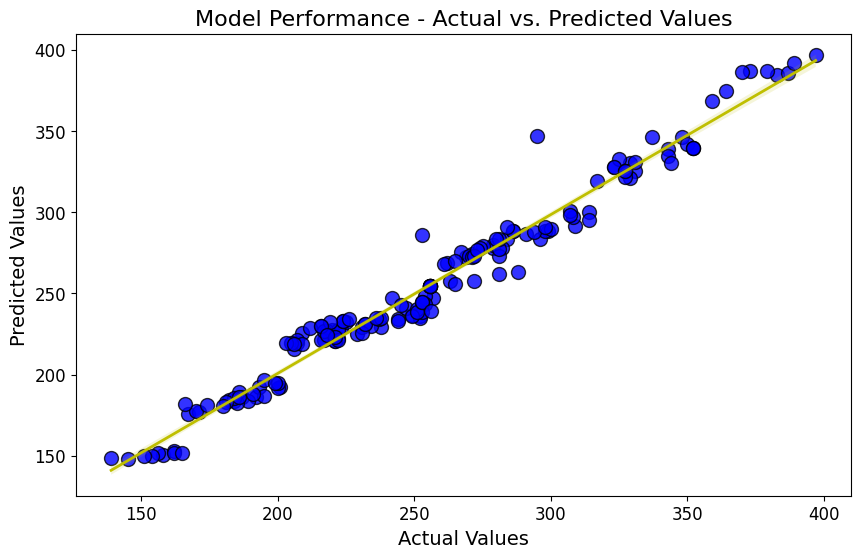

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.8, edgecolors='k', s=100)

sns.regplot(x=y_test, y=y_pred, scatter=False, color='y', line_kws={"color": "y", "lw": 2})

plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [77]:
model.score(X, y)

0.9661560484262088